<a href="https://colab.research.google.com/github/hpsuresh12345/Python-code/blob/master/Timeseries_Prophet_24Aug2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install --upgrade sklearn

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [0]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pyramid as pm
from sklearn import metrics
from fbprophet import Prophet
warnings.filterwarnings('ignore')
import matplotlib.cm as cm

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

In [19]:
fd=sns.load_dataset("flights")
fd.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [20]:
fd=fd.loc[:,['passengers']]
fd.head()

,passengers
0,112
1,118
2,132
3,129
4,121


In [22]:
months=pd.date_range('19490101',periods=144,freq='M')
months
fd['ds']=months
fd.head()
fd.dtypes

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

,passengers,ds
0,112,1949-01-31
1,118,1949-02-28
2,132,1949-03-31
3,129,1949-04-30
4,121,1949-05-31


passengers             int64
ds            datetime64[ns]
dtype: object

In [25]:
fd=fd.rename(columns={'passengers':'y'})
fd=fd.sort_index(axis=1)
fd.head(5)

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [0]:
my_forecast = Prophet(interval_width=0.95)

In [27]:
my_forecast.fit(fd)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
forecast_periods=my_forecast.make_future_dataframe(periods=36,include_history=True,freq='M')
forecast_periods

,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
5,1949-06-30
6,1949-07-31
7,1949-08-31
8,1949-09-30
9,1949-10-31


In [29]:
forecast = my_forecast.predict(forecast_periods)
forecast1 = forecast.loc[:,['ds','yhat']]
forecast1.head()

,ds,yhat
0,1949-01-31,85.240273
1,1949-02-28,77.585537
2,1949-03-31,110.948382
3,1949-04-30,108.547569
4,1949-05-31,111.819264


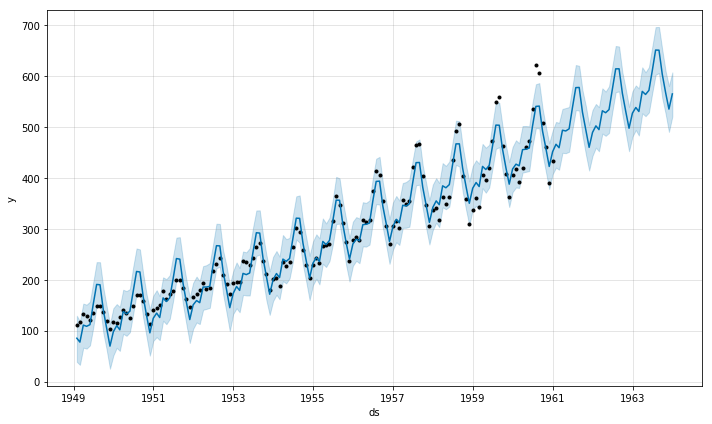

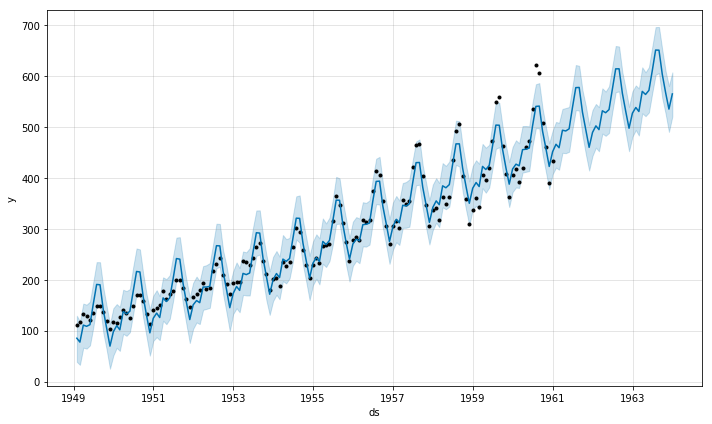

In [31]:
my_forecast.plot(forecast,uncertainty=True)

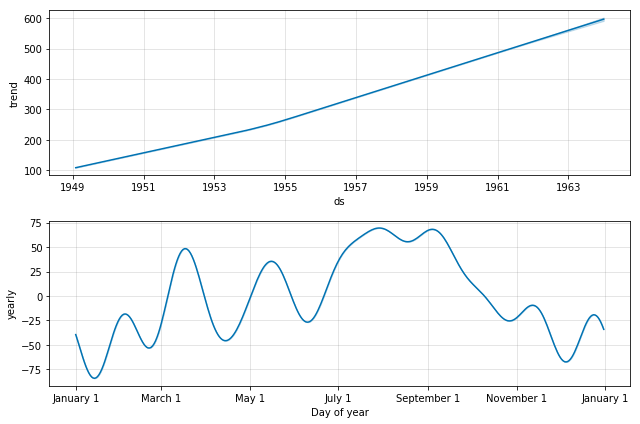

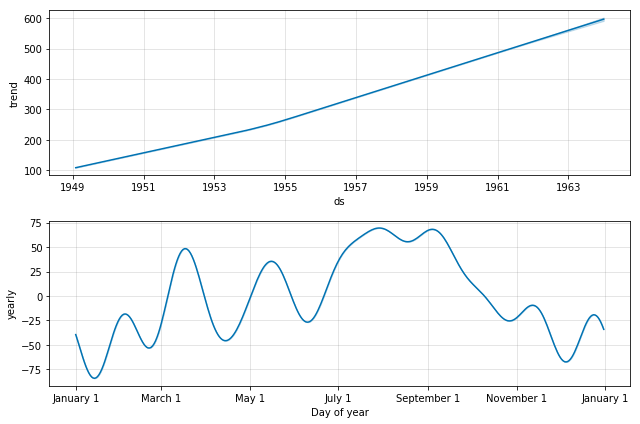

In [32]:
my_forecast.plot_components(forecast)

In [33]:
final_df=pd.merge(forecast1,fd,on='ds',how='inner')
final_df.head()

,ds,yhat,y
0,1949-01-31,85.240273,112
1,1949-02-28,77.585537,118
2,1949-03-31,110.948382,132
3,1949-04-30,108.547569,129
4,1949-05-31,111.819264,121


In [34]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df.yhat,final_df.y),0)

17.0

In [35]:
fd.head()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [37]:
fd.y=np.log(fd.y)
fd.head(5)

,ds,y
0,1949-01-31,4.718499
1,1949-02-28,4.770685
2,1949-03-31,4.882802
3,1949-04-30,4.859812
4,1949-05-31,4.795791


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
5,1949-06-30
6,1949-07-31
7,1949-08-31
8,1949-09-30
9,1949-10-31


,ds,yhat
0,1949-01-31,4.710721
1,1949-02-28,4.709836
2,1949-03-31,4.834695
3,1949-04-30,4.816443
4,1949-05-31,4.815402


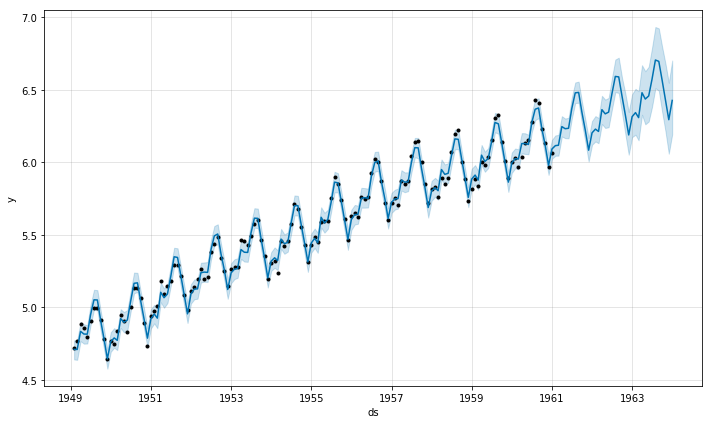

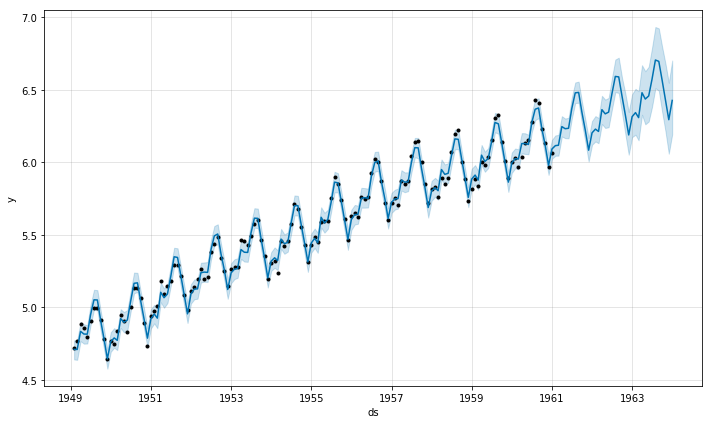

In [38]:
my_forecast=Prophet(interval_width=0.95)
my_forecast.fit(fd)
forecast_periods=my_forecast.make_future_dataframe(periods=36,include_history=True,freq='M')
forecast_periods
forecast=my_forecast.predict(forecast_periods)
forecast1 = forecast.loc[:,['ds','yhat']]
forecast1.head()
my_forecast.plot(forecast,uncertainty=True)

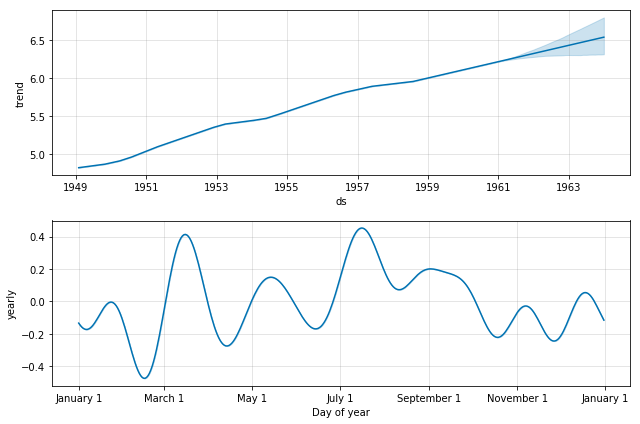

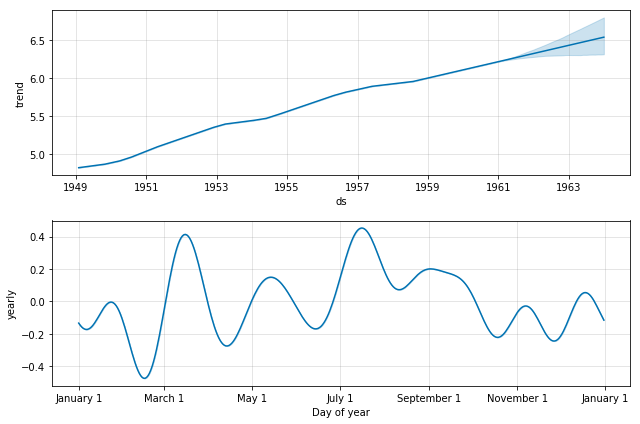

In [39]:
my_forecast.plot_components(forecast)

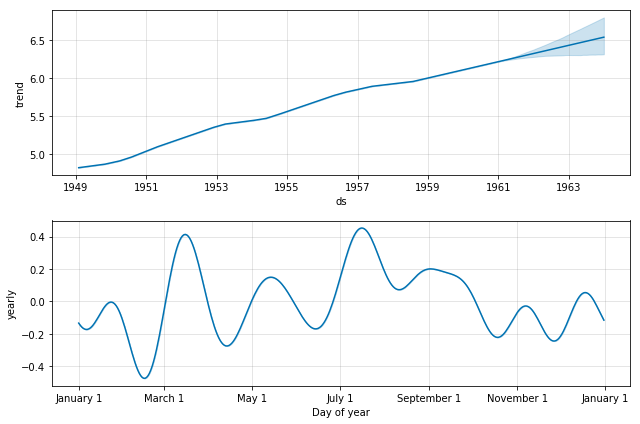

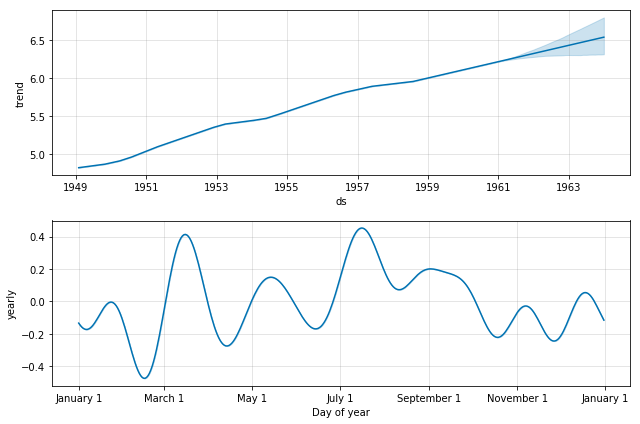

In [42]:
my_forecast.plot_components(forecast)

In [43]:
final_df1=pd.merge(forecast1,fd,on='ds',how='inner')
final_df1.head()

,ds,yhat,y
0,1949-01-31,4.710721,4.718499
1,1949-02-28,4.709836,4.770685
2,1949-03-31,4.834695,4.882802
3,1949-04-30,4.816443,4.859812
4,1949-05-31,4.815402,4.795791


In [44]:
final_df1.yhat=np.e**(final_df1.yhat)
final_df1.y=np.e**(final_df1.y)
final_df1.head()

,ds,yhat,y
0,1949-01-31,111.132216,112.0
1,1949-02-28,111.033940,118.0
2,1949-03-31,125.800197,132.0
3,1949-04-30,123.524950,129.0
4,1949-05-31,123.396403,121.0


In [54]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df1.yhat,final_df1.y),0)

7.0

In [55]:
final_df1.head()

,ds,yhat,y
0,1949-01-31,111.132216,112.0
1,1949-02-28,111.033940,118.0
2,1949-03-31,125.800197,132.0
3,1949-04-30,123.524950,129.0
4,1949-05-31,123.396403,121.0


In [56]:
final_df1.tail()

,ds,yhat,y
139,1960-08-31,587.332969,606.0
140,1960-09-30,509.507243,508.0
141,1960-10-31,452.975816,461.0
142,1960-11-30,395.291502,390.0
143,1960-12-31,442.624606,432.0


In [57]:
forecast2=forecast.loc[144:,['ds','yhat','yhat_lower','yhat_upper']]
forecast2.yhat=np.e**(forecast2.yhat)
forecast2.yhat_lower=np.e**(forecast2.yhat_lower)
forecast2.yhat_lower=np.e**(forecast2.yhat_upper)
np.round(forecast2,0)

,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,453.0,486.0,6.0
145,1961-02-28,454.0,488.0,6.0
146,1961-03-31,517.0,555.0,6.0
147,1961-04-30,509.0,546.0,6.0
148,1961-05-31,511.0,549.0,6.0
149,1961-06-30,586.0,632.0,6.0
150,1961-07-31,652.0,700.0,7.0
151,1961-08-31,654.0,704.0,7.0
152,1961-09-30,570.0,613.0,6.0
153,1961-10-31,503.0,542.0,6.0


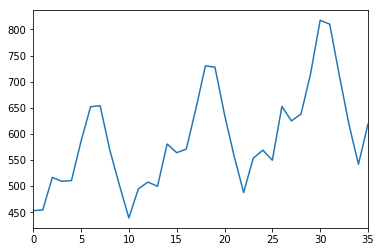

In [58]:
sns.tsplot(forecast2.yhat)
plt.show()